In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
from sklearn.decomposition import FastICA
import heapq
import os
from decimal import Decimal
from sklearn.cluster import KMeans
home_path = os.getcwd().replace('/MultiAnodePMT/notebooks','')
data_region='data_array_region1'
import cPickle as pickle


In [2]:
#Loads file data
data_array=np.load(home_path+'/processed_data/cs10288/'+data_region+'.npy')

In [3]:
    def create_image(data_per_idx,map_file):
        """
        Private method that maps each channel into a pixel in the
        MA-PMT grid and creates its image.

        Args:
        ----
        data_per_idx (array): one realization (trigger/time unit) per channel
        map_file (str): complete path to the mapping file

        Returns:
        -------
        data_matrix (2D array): image of the MA-PMT
        """
        # get mapping for image pixels
        pixel_map = np.loadtxt(map_file)

        data_matrix = np.zeros([8, 8])

        for i in range(8):
            for j in range(8):
                if pixel_map[i, j] == 0:
                    continue
                else:
                    channel = int(pixel_map[i, j]-1)
                    data_matrix[i, j] = data_per_idx[channel]

        return data_matrix

In [4]:
#Path to the channel reading mapping file
map_path = home_path+'/processed_data/cs10288/mapping.txt'

In [5]:
def generate_images(path):
    """
        Private method creating a vector image in a chosen folder
        Only for create image
        
        Args:
        ----
        map_file (str): complete path to where the images will be generated

        Returns:
        Image
        -------
        
    """    
    #Method to generate the images
    for lista in range(len(data_array)):
        #Calling the function create_image
        ma_pmt_image = create_image(data_array[lista,:], map_path)
        ma_pmt_image= (ma_pmt_image-ma_pmt_image.min())/(ma_pmt_image.max()-ma_pmt_image.min())
        #Sets image size
        plt.figure(figsize=(15,15))
        plt.subplots(1,1)
        #Create the image
        plt.matshow(ma_pmt_image,cmap='YlGnBu', fignum=1)
        X= str(lista+1)

        rm = plt.cm.ScalarMappable(cmap='YlGnBu',norm=plt.Normalize(vmin=np.amin(ma_pmt_image), vmax=np.amax(ma_pmt_image)))
        rm._A = []
       
        cb=plt.colorbar(rm)
        cb.ax.tick_params(labelsize=15)
        
        
        tick_locator = ticker.MaxNLocator(nbins=8)
        cb.locator = tick_locator
        cb.update_ticks()
        

        #Sets image margins size
        plt.title("# Pixel Map "+ X , fontsize = 25)
        plt.xticks([])
        plt.yticks([])
        plt.xlabel("Pixels X",fontsize=20)
        plt.ylabel("Pixels Y",fontsize=20)

        plt.savefig(path+'/Imagem '+X+'.png', bbox_inches='tight')

        plt.clf()
        
     


In [6]:
#place to create the image
image_path = home_path+'/MultiAnodePMT/analysis/'+data_region+'/sources_image' 


In [7]:
#generate_images(image_path)

In [9]:
'''image_channels = home_path+'/MultiAnodePMT/analysis/'+data_region+'/Channels' 
for i in range(48):
    plt.figure(figsize=(15,10))
    plt.plot(data_array[:,i],label='Channel '+str(i))
    plt.plot(data_array[:,7],label='Single Anode')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel("Triggers",fontsize=15)
    plt.ylabel("ADC Counts",fontsize=15)
    plt.savefig(image_channels+'/Canal '+str(i)+'.png', bbox_inches='tight',pad_inches = 0)
    plt.close()
'''



In [11]:
file = open(home_path+'/processed_data/Dados_TMP/A12.CS10290F.EBA66.FULL.pkl','rb')
data_array_full = pickle.load(file)

In [14]:
'''from __future__ import division, print_function
import numpy as np
from numpy.random import randn
from numpy.fft import rfft
from scipy import signal
import matplotlib.pyplot as plt

b, a = signal.butter(4, 0.5, analog=False)

soma=np.zeros(433)
for i in range(48):
    sig=data_array_full['data'][:,i]
    sig_ff = signal.filtfilt(b, a, sig)
    sig_lf = signal.lfilter(b, a, signal.lfilter(b, a, sig))

    plt.figure(figsize=(15,10))
    plt.subplot(2, 1, 2)
    plt.plot(sig, color='silver', label='Original')
    plt.plot(sig_ff, color='#3465a4', label='filtfilt')
    #plt.plot(sig_lf, color='#cc0000', label='lfilter')
    plt.grid(True, which='both')
    plt.legend(loc="best")
    plt.xlabel("Triggers",fontsize=15)
    plt.ylabel("ADC Counts",fontsize=15)
    plt.savefig(image_channels+'/Canal '+str(i)+'.png', bbox_inches='tight',pad_inches = 0)
    plt.close()
    if(i!=7):
        soma=np.sum([soma,sig_ff],axis=0)
soma=soma/8'''

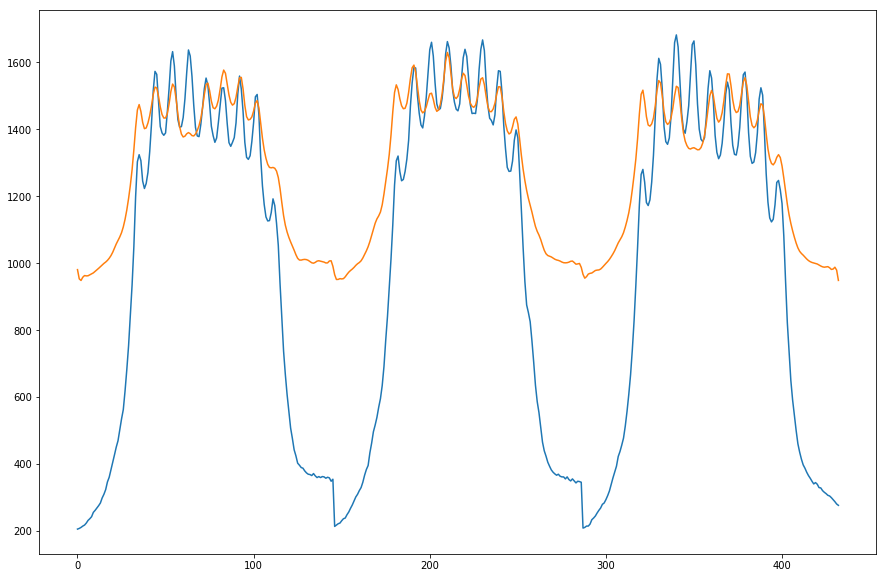

In [77]:
#plt.figure(figsize=(15,10))
#plt.plot(data_array_full['data'][:,7],label='Single Anode')
#plt.plot(soma,label="Soma")
#plt.show()

In [81]:
#soma[0:165].shape

(165,)